In [47]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Needed for Python to find the util modules
sys.path.insert(0, "src")
sys.path.insert(0, "..")
import util.m06_model_plotting as plot_util
import util.m00_general_util as util

In [ ]:
os.getcwd()

In [50]:
# Combining JSON files into one
my_files = ["../../output/model_output_random_split25.json", "../../temp/pls_metrics.json"]
util.merge_json_files(my_files, output_file="all_models.json")

In [51]:
def show_train_test_heatmap(model_results, title, left_metric = "Test_R2", right_metric = "Train_R2", cmap = "YlGnBu"):
    pivot = plot_util.create_model_performance_pivot(model_results, metric=left_metric)
    fig, axes = plt.subplots(1, 2, figsize=(15,4))
    ax1, ax2 = axes
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax1)
    ax1.set_title(f"{title} - {left_metric}")
    pivot = plot_util.create_model_performance_pivot(model_results, metric=right_metric)
    sns.heatmap(pivot, cmap=cmap, annot=True, fmt=".3f", ax=ax2)
    ax2.set_title(f"{title} - {right_metric}")
    plt.show()

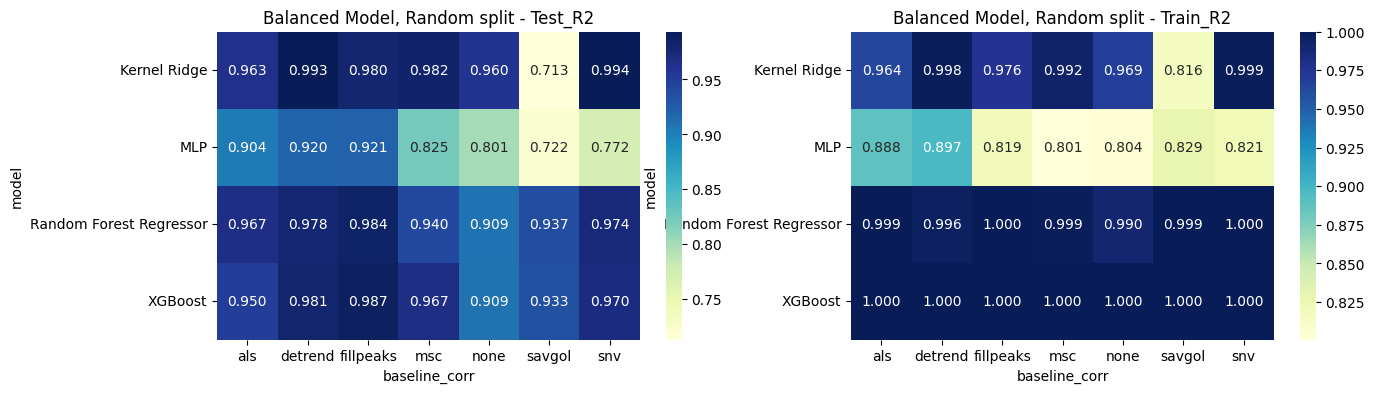

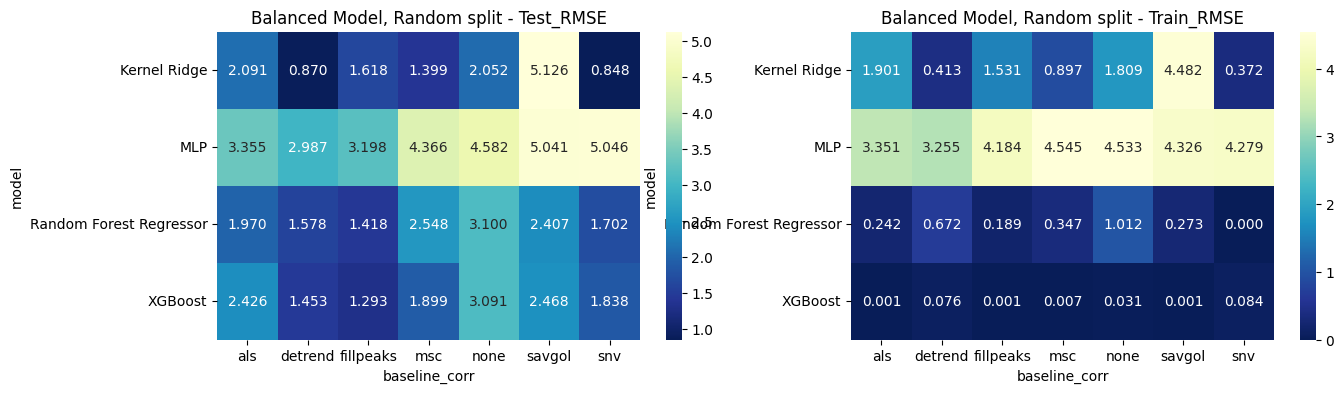

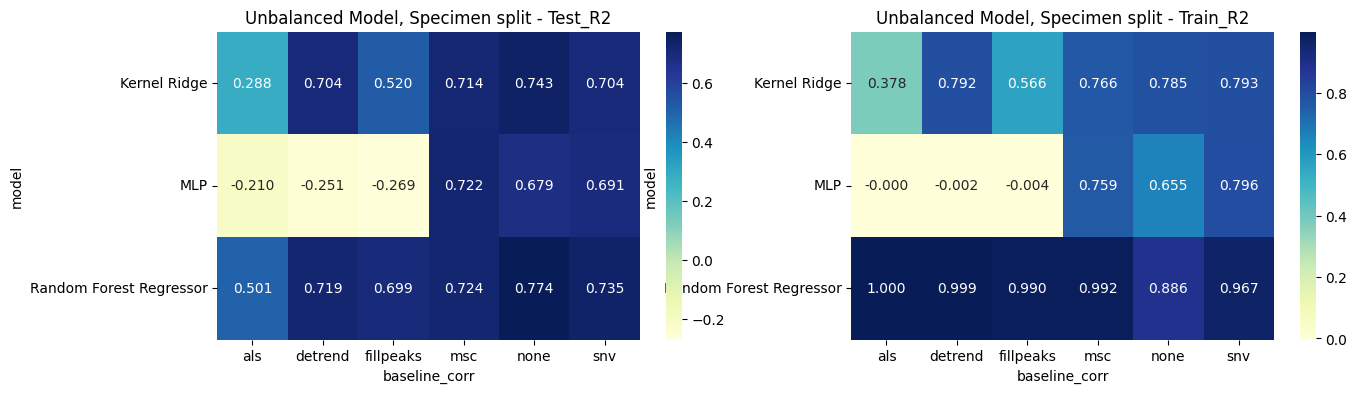

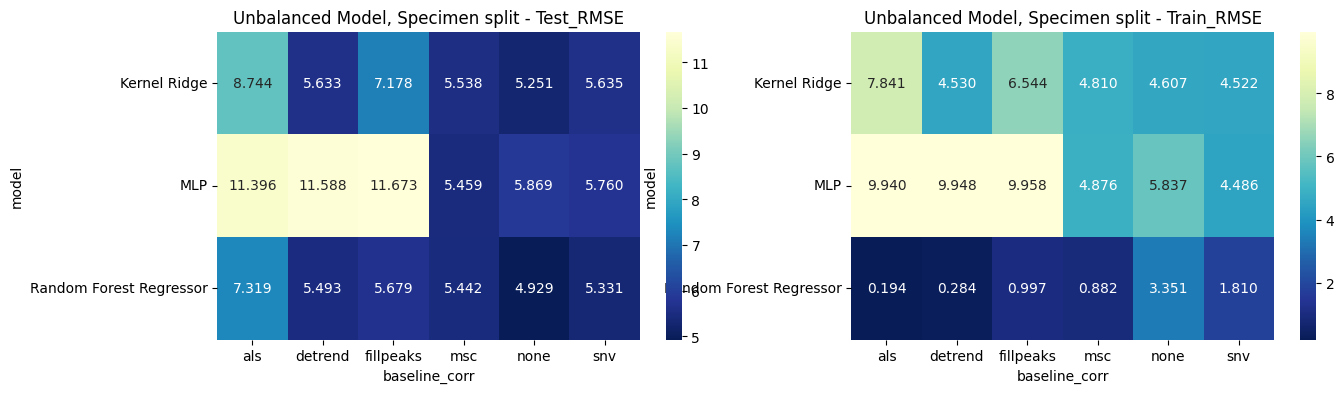

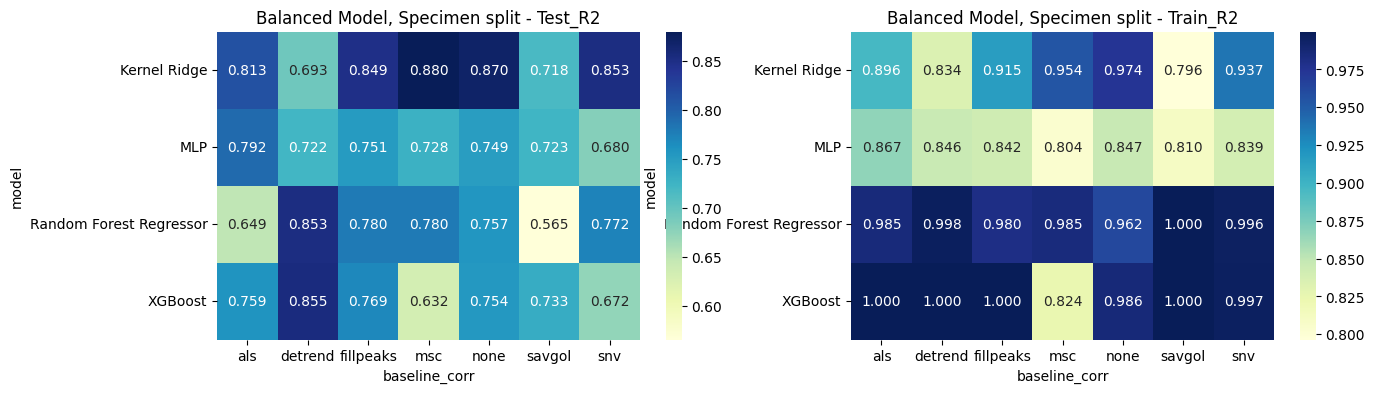

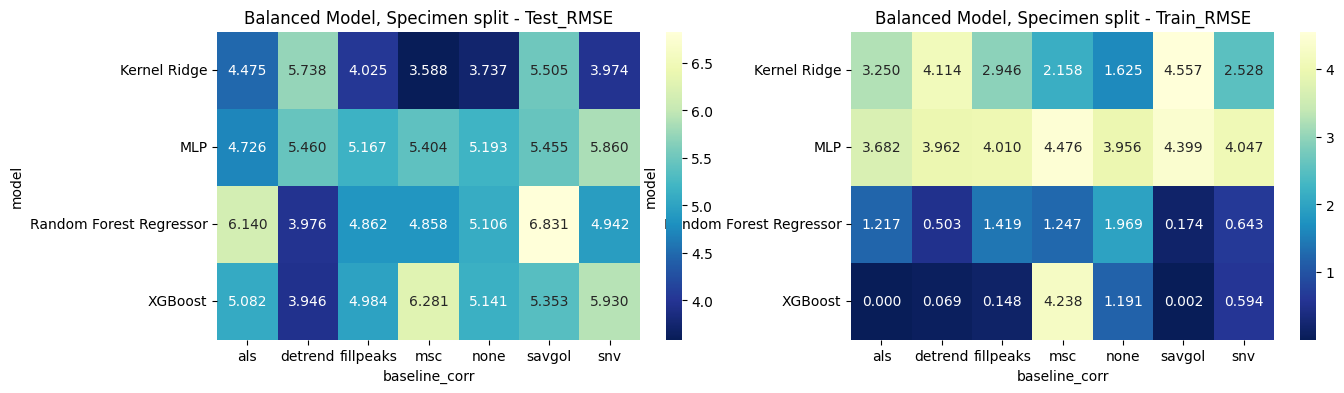

In [52]:
balanced_random = pd.read_json("../../output/model_evaluation/model_output_balanced_random.json")
show_train_test_heatmap(balanced_random, "Balanced Model, Random split")
show_train_test_heatmap(balanced_random, "Balanced Model, Random split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

unbalanced_specimen1 = pd.read_json("../../output/model_evaluation/model_output_unbalanced_specimen1.json")
show_train_test_heatmap(unbalanced_specimen1, "Unbalanced Model, Specimen split")
show_train_test_heatmap(unbalanced_specimen1, "Unbalanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")

balanced_specimen1 = pd.read_json("../../output/model_evaluation/model_output_balanced_specimen1.json")
show_train_test_heatmap(balanced_specimen1, "Balanced Model, Specimen split")
show_train_test_heatmap(balanced_specimen1, "Balanced Model, Specimen split", "Test_RMSE", "Train_RMSE", "YlGnBu_r")
